In [1]:
import numpy as np, pandas as pd
import warnings
from sklearn.externals import joblib
warnings.filterwarnings('ignore')

# scikit-learn pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# feature processing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
# baselinemodel
from sklearn.tree import DecisionTreeClassifier

# define the pipeline used
# pre-processing pipeline
column_trans = ColumnTransformer(
    [('onehot', ce.OneHotEncoder(), ['satellite', 'daynight', 'type']),
    ('scale', StandardScaler(), ['brightness', 'track', 'scan', 'acq_time', 'confidence', 'bright_t31', 'frp'])],
    remainder='passthrough')

# Full Dataset for validation
# X_train = pd.read_pickle('Data/X_train_full.pkl')
# y_train = pd.read_pickle('Data/y_train_full.pkl')
X_test = pd.read_pickle('Data/X_test_full.pkl')
y_test = pd.read_pickle('Data/y_test_full.pkl')

In [2]:
X_test.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight,type,FIRE_YEAR,MONTH,WEEK,DAY
1865983,19.410400,-155.277100,306.399994,1.1,1.1,830,Terra,68,284.000000,12.100000,N,2,2015,1,1,1
1865984,19.442499,-155.004700,324.100006,1.1,1.0,830,Terra,100,286.000000,29.000000,N,2,2015,1,1,1
1865985,19.460100,-154.992493,313.000000,1.1,1.0,830,Terra,86,288.000000,16.700001,N,2,2015,1,1,1
1865986,19.408701,-155.287598,309.799988,1.1,1.1,830,Terra,78,284.000000,14.800000,N,2,2015,1,1,1
1865987,41.633301,-87.136101,301.000000,1.9,1.3,1717,Terra,33,270.700012,22.700001,D,2,2015,1,1,1


In [2]:
# Load pre-trained baseline model
pickle_path = 'Models/Baseline/dtc_baseline_full.pkl'

# decision tree model
dtm = joblib.load(pickle_path)

In [3]:
dtm.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
            transformer_weights=None,
            transformers=[('onehot', OneHotEncoder(cols=None, drop_invariant=False, handle_missing='value',
          handle_unknown='value', return_df=True, use_cat_names=False,
          verbose=0), ['satellite', 'daynight', 'type']), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True), ['brightness', 'track', 'scan', 'acq_time', 'confidence', 'bright_t31', 'frp'])])),
  ('decisiontreeclassifier',
   DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=10, min_samples_split=5,
               min_weight_fraction_leaf=0.0, presort=False, random_state=314,
               splitter='best'))],
 'columntransformer': ColumnTransformer

In [4]:
X_test.head()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,bright_t31,frp,daynight,type,FIRE_YEAR,MONTH,WEEK,DAY
1865983,19.410400,-155.277100,306.399994,1.1,1.1,830,Terra,68,284.000000,12.100000,N,2,2015,1,1,1
1865984,19.442499,-155.004700,324.100006,1.1,1.0,830,Terra,100,286.000000,29.000000,N,2,2015,1,1,1
1865985,19.460100,-154.992493,313.000000,1.1,1.0,830,Terra,86,288.000000,16.700001,N,2,2015,1,1,1
1865986,19.408701,-155.287598,309.799988,1.1,1.1,830,Terra,78,284.000000,14.800000,N,2,2015,1,1,1
1865987,41.633301,-87.136101,301.000000,1.9,1.3,1717,Terra,33,270.700012,22.700001,D,2,2015,1,1,1


In [5]:
# test our loaded model
dtm.score(X_test, y_test)

0.6731734653372873

In [11]:
# now I'll evaluate a fire prediction metric of confidence > 90 vs the model

def predict_90(row):
    
    if row['confidence'] > 90:
        return 1
    else:
        return 0

y_pred_c90 = X_test.apply(lambda row : predict_90(row), axis=1)

In [18]:
# validation imports
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# y_pred_proba = dtm.predict_proba(X_test)[:,1]

y_pred = dtm.predict(X_test)

f1_score(y_test, y_pred)

/home/nedderlander/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:605: DataConversionWarning: Data with input dtype uint8, uint16, float32 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


0.5130123164706701

In [19]:
f1_score(y_test, y_pred_c90)

0.3017970844504021

In [21]:

def normalized_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred) 
    #normalize cm
    array = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(array, range(2),
                      range(2))
    #plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})#.set_title('Normalized confusion matrix')# font size
    ax.set(xlabel='Predicted Fires', ylabel='True Fires', title = title)
    plt.show();

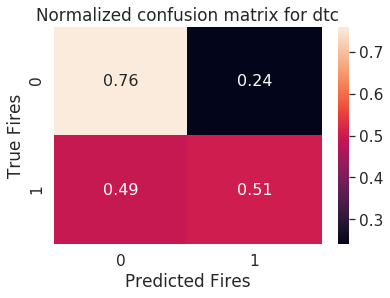

In [22]:
normalized_confusion_matrix(y_test, y_pred, 'Normalized confusion matrix for dtc')

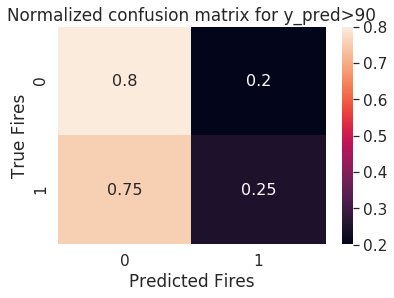

In [23]:
normalized_confusion_matrix(y_test, y_pred_c90, 'Normalized confusion matrix for y_pred>90')

In [ ]:
# My take-away from this is that even a simple DTC is better than our CI>90 metric, 
# I think it's time to run scattershot small models and then use the output to tune a big model